<a href="https://colab.research.google.com/github/arunravi8595/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [47]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv",header= None)
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [48]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,19.520763,14.107285,11.445280,-1.754815,11.038325,-1.682015,-3.072122,-1.103119,-0.619151,0.174010,-0.921997,2.336112,14.812794,19.702896,35.003861,16.831144,6.108754,3.492787,5.393417,3.160797,27.448552,3.465963,3.290261,31.892051,14.294251,3.125464,3.381442,31.184107,9.610589,8.527044,...,3.147019,3.156669,19.295580,30.078602,3.261098,2.773196,29.075706,2.804985,2.818099,19.205059,64.955502,65.511747,65.230747,63.738037,64.060745,64.784238,63.813772,63.885116,63.075803,63.645943,63.130073,63.174054,62.956359,62.417244,62.222051,61.607885,62.263703,61.753387,62.469264,60.689216,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,38.329975,32.641415,29.938683,5.155992,29.526365,5.355089,5.281486,4.532969,5.039152,5.083095,5.216848,6.856606,34.587240,39.682897,48.637167,37.051743,21.688893,7.074558,19.659326,6.401350,44.864605,12.037673,5.717119,47.440118,34.057662,5.703922,4.991137,47.176688,27.673845,26.397293,...,9.383020,6.160750,39.238572,46.233500,10.976394,6.659336,45.963476,6.105714,6.822990,38.955997,47.396153,45.921201,46.644798,48.075806,47.520009,46.243016,47.220253,46.804611,47.675717,47.133626,47.002169,47.332326,46.966353,47.621754,47.593983,47.967071,47.183236,47.224021,46.479714,48.088127,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,53.000000,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,-0.830000,-0.530000,-1.020000,-6.260000,-1.410000,-6.210000,-7.430000,-4.420000,-4.420000,-3.450000,-5.050000,-0.730000,-1.840000,-2.480000,-3.690000,-2.280000,-1.500000,0.730000,-1.410000,0.340000,-2.380000,-0.580000,0.680000,-3

In [49]:
data.drop(columns = 0, inplace = True)

In [50]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  non_rated = np.where(new_data == 99)
  new_data[non_rated] = np.NaN
  return new_data, (rated[0][idx], rated[1][idx])

In [53]:
new_arr.head()

AttributeError: ignored

In [6]:
arr = data.values
new_arr , idx = replace(arr, percentage=0.1)
df = pd.DataFrame(new_arr)

In [7]:
df.mean(axis = 0, skipna = True).idxmin()
min(df.mean(axis = 0, skipna = True))

-3.8332307582464664

In [8]:
df.mean(axis = 0, skipna = True).idxmax()
max(df.mean(axis = 0, skipna = True))

3.663049203665795

In [9]:
data.isnull().sum()

1      0
2      0
3      0
4      0
5      0
      ..
96     0
97     0
98     0
99     0
100    0
Length: 100, dtype: int64

In [10]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [11]:
arr = data.values
new_arr , idx = replace(arr, percentage=0.1)

In [12]:
new_arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [14]:
n_latent_factors = 2
user_ratings = new_arr
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [15]:
latent_item_features.shape[0]


100

In [16]:
latent_user_preferences.shape[0]


24983

In [17]:
def predict_rating(user_id, item_id):
    
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
   
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=23.215911


ValueError: ignored

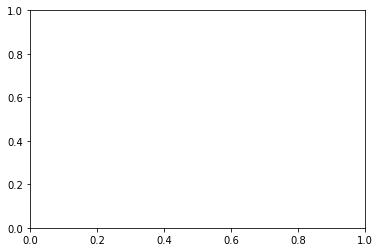

In [86]:
num_iter = 10
hist = sgd(num_iter)  
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [19]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.128, 0.687, 0.718, ..., 1.272, 0.487, 1.729],
       [1.132, 0.696, 0.721, ..., 1.305, 0.473, 1.782],
       [2.202, 1.345, 1.403, ..., 2.498, 0.942, 3.401],
       ...,
       [0.71 , 0.443, 0.453, ..., 0.847, 0.28 , 1.164],
       [0.8  , 0.476, 0.509, ..., 0.854, 0.373, 1.149],
       [2.134, 1.291, 1.359, ..., 2.365, 0.944, 3.205]])

In [20]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [21]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.1278672607405695)","(8.79, 0.6872172086255882)","(-9.66, 0.7184395620167916)","(nan, -0.7134219252020207)","(-7.52, 0.7298758641918075)","(-8.5, 1.9053278353806398)","(-9.85, -0.04620083995244325)","(4.17, -0.35552824369800035)","(-8.98, -0.0793377860321447)","(-4.76, 1.4038258587415267)","(-8.5, 2.021400426473128)","(nan, 1.8688655634073577)","(-7.18, -1.274230837343736)","(8.45, 1.8293015812051003)","(-7.18, -1.353757132079123)","(-7.52, -2.4837060026548707)","(-7.43, -0.6181615961810017)","(-9.81, -0.32261201393716016)","(-9.85, 0.509081762013823)","(-9.85, -0.3765074899981199)","(-9.37, 2.4148190828452027)","(1.5, 1.2983157220151282)","(-4.37, 0.5351751587163264)","(-9.81, -1.0330751440648986)","(nan, 0.8822775683345866)","(1.12, 1.7443107448941706)","(7.82, 3.160808598065289)","(2.86, 1.8370347249422019)","(9.13, 2.9985598717672475)","(-7.43, 0.21666378051252763)","(2.14, 2.4633601012506428)","(-4.08, 3.1619061149523544)","(-9.08, -0.6312584647722439)","(7.82, 1.395739950950458)","(5.05, 3.097346329018695)","(4.95, 3.2349814937229917)","(-9.17, -0.7607122857790147)","(-8.4, 1.5314446165721767)","(-8.4, 1.5775755377693557)","(-8.4, 1.442784792198803)",...,"(8.59, 2.6913132309625776)","(3.59, 3.0301287481004255)","(-6.84, 0.7578370015877717)","(-9.03, -0.11694564331983609)","(2.82, 2.553257056262631)","(-1.36, 2.706551685494776)","(-9.08, -0.28179367594329796)","(8.3, 2.7375821508857805)","(5.68, 2.77191773547408)","(-4.81, 0.9709735119006379)","(nan, -0.08033567407051956)","(nan, 2.804058395485767)","(nan, 1.49317372787908)","(nan, -0.7580951170688579)","(nan, 0.28688743595045024)","(nan, 2.536726032426423)","(nan, 1.137860591652627)","(-9.42, 2.0072279629677157)","(nan, 0.7106773315993172)","(nan, 1.6066316559819123)","(nan, 2.06347191092115)","(-7.72, 1.2590136979777773)","(nan, 2.260771537450164)","(nan, 1.107847658436089)","(nan, 1.3514204773375713)","(nan, 0.7330037138697412)","(nan, 2.053606459402391)","(nan, 2.2305511527187365)","(nan, 3.3456505527453873)","(nan, 1.0476403214128616)","(2.82, 2.1448259844567685)","(nan, 1.5435722054095204)","(nan, 2.5709697803191838)","(nan, 1.375647503521449)","(nan, 1.328864379852304)","(nan, 1.7361121185850745)","(-5.63, 1.8287327099971504)","(nan, 1.2717055605445435)","(nan, 0.4866570929942795)","(nan, 1.7292848101832041)"
1,"(4.08, 1.1319660092510004)","(-0.29, 0.6962889192504781)","(6.36, 0.7213368038502624)","(4.37, -0.7188444991929362)","(-2.38, 0.7256302570893924)","(-9.66, 1.9236132723206139)","(-0.73, -0.03705491084373315)","(-5.34, -0.36599091167177)","(8.88, -0.04371193480945596)","(9.22, 1.4441383738826674)","(6.75, 2.044603633476954)","(8.64, 1.9153694039574238)","(4.42, -1.2895163248362402)","(7.43, 1.8495406442365472)","(4.56, -1.3664961772270794)","(-0.97, -2.549847893659694)","(4.66, -0.613845983343152)","(-0.68, -0.328920594587301)","(3.3, 0.4998419739505738)","(-1.21, -0.38468268636988767)","(0.87, 2.4455219617388644)","(8.64, 1.3305288418106027)","(8.35, 0.5563579134370541)","(9.17, -1.0337222884983324)","(nan, 0.87370210318063)","(7.57, 1.7439829722969267)","(4.71, 3.1916645788474995)","(0.87, 1.8941232746192216)","(-0.39, 3.001317140916876)","(6.99, 0.2095234651882348)","(6.5, 2.49431301235622)","(nan, 3.1891370336123575)","(nan, -0.5981606890511809)","(9.03, 1.4052558182816393)","(-1.8, 3.1225533903593883)","(0.73, 3.258666858084448)","(7.09, -0.7575753115577589)","(3.4, 1.55121662207577)","(-0.87, 1.5949718468968737)","(nan, 1.4804873536664234)",...,"(-6.7, 2.750125566951838)","(-3.35, 3.064558636613148)","(-9.03, 0.7785288560098521)","(4.47, -0.10689717004900129)","(4.08, 2.599999501997567)","(-3.83, 2.7167749863120183)","(8.74, -0.2901699053798545)","(1.12, 2.7643670568060137)","(0.78, 2.8154440697954497)","(7.

In [89]:
df_Items = pd.read_excel("movies_latent_factors.xlsx", sheet_name='Items')
df_Items.head()

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566


In [90]:
id = df_Items['Factor3'].argmax()


In [92]:
df_Items.head(id + 1)


,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
5,24,Kill Bill: Vol. 1 (2003),-0.645019,1.997440,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656
6,38,Eternal Sunshine of the Spotless Mind (2004),-0.695539,1.771799,0.143646,0.244718,0.434222,-0.367995,-0.186841,-0.961435,0.240228,-0.474231,0.492446,-1.041901,-0.181657,0.479142,0.237458
7,63,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),-0.615623,1.390542,0.759321,-0.408655,-0.099375,-0.073539,-0.261833,-0.923701,0.073849,-0.041067,0.782604,-0.539200,0.290092,-0.229462,0.432006
8,77,Memento (2000),-1.443730,1.466671,-0.121894,-0.237937,-0.301010,-0.650094,-0.000577,-1.122585,-0.201654,-0.662704,0.247859,-0.429991,-0.032267,0.513381,0.505265
9,85,Raiders of the Lost Ark (Indiana Jones and the...,-1.241724,0.021130,0.489161,0.424584,-1.262253,1.190654,-0.606434,0.305721,1.438862,0.402682,0.438831,0.784948,-0.874375,-0.399984,-0.197686


In [93]:
df_Users = pd.read_excel("movies_latent_factors.xlsx", sheet_name='Users')
df_Users.head()

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669


In [101]:
user_factors= df_Users[(df_Users["User"] == 5338)]
user_factors = user_factors.drop('User', axis=1)
user_factors

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
16,-0.061259,0.014661,0.011412,0.001727,0.064996,-0.078448,0.05951,0.017402,-0.040234,-0.073409,-0.016323,0.031774,-0.062413,0.107708,0.065081


In [95]:
movie_factors = df_Items[(df_Items["Movie ID"] == 72)]
movie_factors = movie_factors.drop(["Movie ID", "Title"], axis=1)
movie_factors

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15


In [96]:
user_factors.values.dot(movie_factors.values.T)


array([], shape=(0, 0), dtype=float64)

In [102]:
user_factors= df_Users[(df_Users["User"] == 5338)]
user_factors = user_factors.drop('User', axis=1)
user_factors

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
16,-0.061259,0.014661,0.011412,0.001727,0.064996,-0.078448,0.05951,0.017402,-0.040234,-0.073409,-0.016323,0.031774,-0.062413,0.107708,0.065081


In [99]:
movie_ids = [85, 120, 672, 238, 36658]
ratings = {}
for id in movie_ids:
  movie_factors = df_Items[(df_Items["Movie ID"] == id)]
  movie_factors = movie_factors.drop(["Movie ID", "Title"], axis=1)
  ratings[id] = user_factors.values.dot(movie_factors.values.T)
ratings

{85: array([[-0.195]]),
 120: array([[0.232]]),
 238: array([[0.251]]),
 672: array([[0.302]]),
 36658: array([[-0.193]])}

In [100]:
movie_ids = [85, 120, 672, 238, 36658]
ratings = {}
for id in movie_ids:
  movie_factors = df_Items[(df_Items["Movie ID"] == id)]
  movie_factors = movie_factors.drop(["Movie ID", "Title"], axis=1)
  ratings[id] = user_factors.values.dot(movie_factors.values.T)
ratings

{85: array([[-0.195]]),
 120: array([[0.232]]),
 238: array([[0.251]]),
 672: array([[0.302]]),
 36658: array([[-0.193]])}